In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools as it
from glob import glob
from matplotlib import pyplot as plt
from pymea import plotting
from pymea import matlab_compatibility as mc
from datetime import datetime
from pymea import statistics as stat

In [4]:
data_path = '/home/sean/mea data/03/03_spk_freq_table.csv'
data_table = pd.read_csv(data_path)
time_vector = data_table['time'].map(mc.datetime_str_to_datetime)

In [5]:
def is_early_top(unit_name):
    [row,col] = mc.get_row_col_number_tuple(unit_name)
    if row <= 3 and col <= 4:
        return 1
    else:
        return False
    
def is_early_bottom(unit_name):
    [row,col] = mc.get_row_col_number_tuple(unit_name)
    if row > 3 and col <= 4:
        return True
    else:
        return False
    
def is_late_top(unit_name):
    [row,col] = mc.get_row_col_number_tuple(unit_name)
    if row <= 3 and col > 4:
        return 1
    else:
        return False
    
def is_late_bottom(unit_name):
    [row,col] = mc.get_row_col_number_tuple(unit_name)
    if row > 3 and col > 4:
        return True
    else:
        return False
    
def is_all(unit_name):
    return True

cond_filt = {
    'Early_All': is_early_top,
    'Early_Some': is_early_bottom, 
    'Late_All': is_late_top,
    'Late_Some': is_late_bottom
}

In [6]:
cat_table = plotting.construct_categorized_dataframe(data_table, cond_filt)

In [7]:
cat_table['spike_freq'] = cat_table['spike_freq']/60 # convert from spikes/1 minute to spikes/sec
cat_table['spike_freq'] = plotting.smooth(cat_table['spike_freq'], kernel_size=5) # smooth using a 5 minute kernel
cat_table = cat_table.query('spike_freq > 0.05') # eliminate neurons that barely spike

In [8]:
orig_cat_table = cat_table

In [9]:
cat_table = pd.concat([
                        orig_cat_table.query('time > "2017-08-04 11:08:00" and time < "2017-08-04 12:08:00"'),
                        orig_cat_table.query('time > "2017-08-07 18:35:00" and time < "2017-08-07 19:35:00"'),
                        orig_cat_table.query('time > "2017-08-08 06:35:00" and time < "2017-08-08 07:35:00"'),
                        orig_cat_table.query('time > "2017-08-08 18:14:00" and time < "2017-08-08 19:14:00"'),
                        orig_cat_table.query('time > "2017-08-09 06:14:00" and time < "2017-08-09 07:14:00"'),
                        orig_cat_table.query('time > "2017-08-09 17:34:00" and time < "2017-08-09 18:34:00"'),
                        orig_cat_table.query('time > "2017-08-10 05:34:00" and time < "2017-08-10 06:34:00"'),
                        orig_cat_table.query('time > "2017-08-10 14:47:00" and time < "2017-08-10 15:47:00"'),
                        orig_cat_table.query('time > "2017-08-10 17:58:00" and time < "2017-08-10 18:58:00"'),
                        orig_cat_table.query('time > "2017-08-11 14:55:00" and time < "2017-08-11 15:55:00"'),
                        orig_cat_table.query('time > "2017-08-11 18:14:00" and time < "2017-08-11 19:14:00"'),
                        orig_cat_table.query('time > "2017-08-12 06:14:00" and time < "2017-08-12 07:14:00"'),
                        orig_cat_table.query('time > "2017-08-14 14:07:00" and time < "2017-08-14 15:07:00"'),
                        orig_cat_table.query('time > "2017-08-15 14:53:00" and time < "2017-08-15 15:43:00"'),
                        orig_cat_table.query('time > "2017-08-17 14:30:00" and time < "2017-08-17 15:30:00"'),
                        orig_cat_table.query('time > "2017-08-18 15:30:00" and time < "2017-08-18 16:30:00"'),
                        orig_cat_table.query('time > "2017-08-21 08:51:00" and time < "2017-08-21 09:51:00"'),
                        orig_cat_table.query('time > "2017-08-22 11:15:00" and time < "2017-08-22 12:15:00"'),
                        orig_cat_table.query('time > "2017-08-23 17:53:00" and time < "2017-08-23 18:53:00"'),
                        orig_cat_table.query('time > "2017-08-24 11:17:00" and time < "2017-08-24 12:17:00"'),
                        orig_cat_table.query('time > "2017-08-24 16:23:00" and time < "2017-08-25 00:23:00"'),
                        orig_cat_table.query('time > "2017-08-25 04:23:00" and time < "2017-08-25 08:53:00"'),
                        orig_cat_table.query('time > "2017-08-25 15:40:00" and time < "2017-08-25 16:40:00"'),
                        orig_cat_table.query('time > "2017-08-26 03:40:00" and time < "2017-08-26 04:40:00"'),
                        orig_cat_table.query('time > "2017-08-26 15:40:00" and time < "2017-08-26 16:40:00"'),
                        orig_cat_table.query('time > "2017-08-27 03:40:00" and time < "2017-08-27 04:40:00"'),
                        orig_cat_table.query('time > "2017-08-27 15:40:00" and time < "2017-08-27 16:40:00"'),
                        orig_cat_table.query('time > "2017-08-28 03:40:00" and time < "2017-08-28 04:40:00"'),
                        orig_cat_table.query('time > "2017-08-29 12:28:00" and time < "2017-08-29 13:28:00"'),
                        orig_cat_table.query('time > "2017-08-29 15:41:00" and time < "2017-08-29 16:41:00"'),
                        orig_cat_table.query('time > "2017-08-30 11:29:00" and time < "2017-08-30 12:29:00"'),
                        orig_cat_table.query('time > "2017-08-31 11:09:00" and time < "2017-08-31 12:09:00"'),
                        orig_cat_table.query('time > "2017-08-31 15:04:00" and time < "2017-08-31 16:04:00"'),])

In [10]:
early_media_changes = ("2017-08-04 13:30:00", "2017-08-07 16:00:00", "2017-08-10 16:00:00", 
                      "2017-08-14 15:15:00", "2017-08-17 16:00:00", "2017-08-21 08:00:00", "2017-08-25 13:00:00", 
                      "2017-08-28 16:00:00", "2017-08-31 13:00:00")
late_media_changes = ("2017-08-04 13:30:00", "2017-08-08 16:00:00", "2017-08-11 16:00:00", 
                     "2017-08-15 16:00:00", "2017-08-18 13:30:00", "2017-08-22 10:00:00", "2017-08-24 15:00:00", 
                     "2017-08-29 13:00:00")

rec_starts = ("2017-08-04 11:08:00", "2017-08-07 18:35:00", "2017-08-08 06:35:00", "2017-08-08 18:14:00", 
             "2017-08-09 06:14:00", "2017-08-09 17:34:00", "2017-08-10 05:34:00", "2017-08-10 14:47:00", 
             "2017-08-10 17:58:00", "2017-08-11 14:55:00", "2017-08-11 18:14:00", "2017-08-12 06:14:00", 
             "2017-08-14 14:07:00", "2017-08-15 14:53:00", "2017-08-17 14:30:00", "2017-08-18 15:30:00", 
             "2017-08-21 08:51:00", "2017-08-22 11:15:00", "2017-08-23 17:53:00", "2017-08-24 11:17:00", 
             "2017-08-24 16:23:00", "2017-08-25 04:23:00", "2017-08-25 15:40:00", "2017-08-26 03:40:00", 
             "2017-08-26 15:40:00", "2017-08-27 03:40:00", "2017-08-27 15:40:00", "2017-08-28 03:40:00", 
             "2017-08-29 12:28:00", "2017-08-29 15:41:00", "2017-08-30 11:29:00", "2017-08-31 11:09:00", 
             "2017-08-31 15:04:00")
rec_ends = ("2017-08-04 12:08:00", "2017-08-07 19:35:00", "2017-08-08 07:35:00", "2017-08-08 19:14:00", 
           "2017-08-09 07:14:00", "2017-08-09 18:34:00", "2017-08-10 06:34:00", "2017-08-10 15:47:00", 
           "2017-08-10 18:58:00", "2017-08-11 15:55:00", "2017-08-11 19:14:00", "2017-08-12 07:14:00", 
           "2017-08-14 15:07:00", "2017-08-15 15:43:00", "2017-08-17 15:30:00", "2017-08-18 16:30:00", 
           "2017-08-21 09:51:00", "2017-08-22 12:15:00", "2017-08-23 18:53:00", "2017-08-24 12:17:00", 
           "2017-08-25 00:23:00", "2017-08-25 08:53:00", "2017-08-25 16:40:00", "2017-08-26 04:40:00", 
           "2017-08-26 16:40:00", "2017-08-27 04:40:00", "2017-08-27 16:40:00", "2017-08-28 04:40:00", 
           "2017-08-29 13:28:00", "2017-08-29 16:41:00", "2017-08-30 12:29:00", "2017-08-31 12:09:00", 
           "2017-08-31 16:04:00")
num_rec = 33

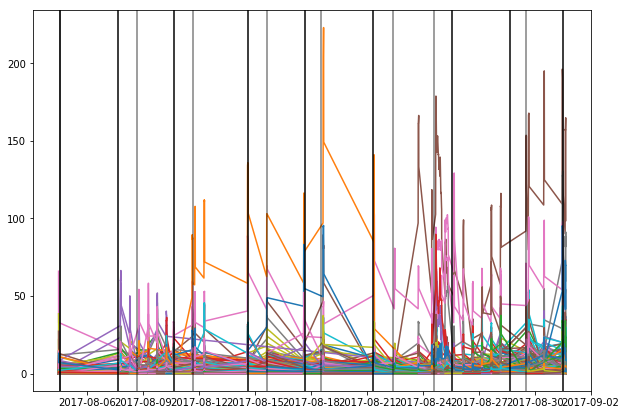

In [38]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces(cat_table)
for x in early_media_changes:
    plt.axvline(x, color = 'k')
for x in late_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

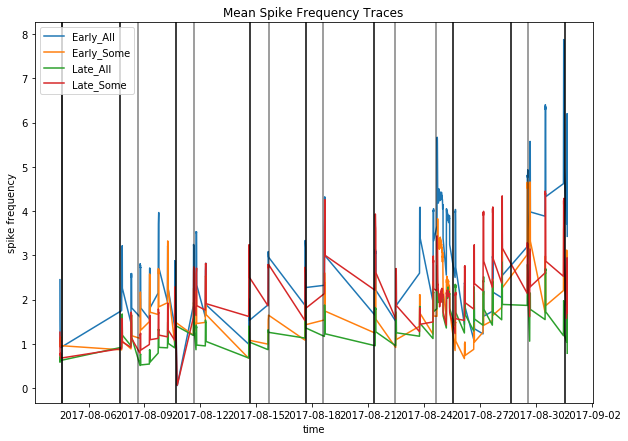

In [42]:
plt.figure(figsize=(10,7))
plotting.plot_mean_frequency_traces(cat_table)
for x in early_media_changes:
    plt.axvline(x, color = 'k')
for x in late_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

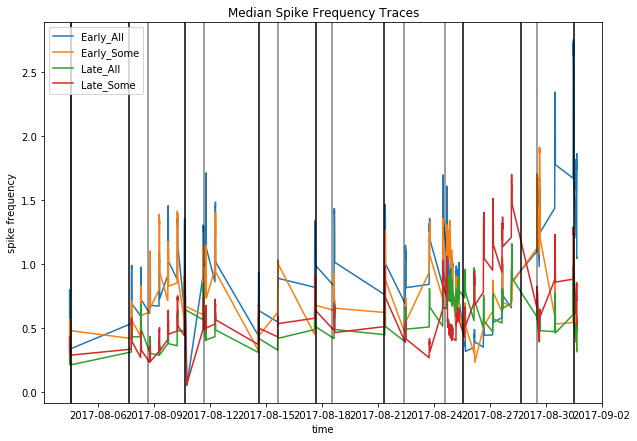

In [43]:
plt.figure(figsize=(10,7))
plotting.plot_median_frequency_traces(cat_table)
for x in early_media_changes:
    plt.axvline(x, color = 'k')
for x in late_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

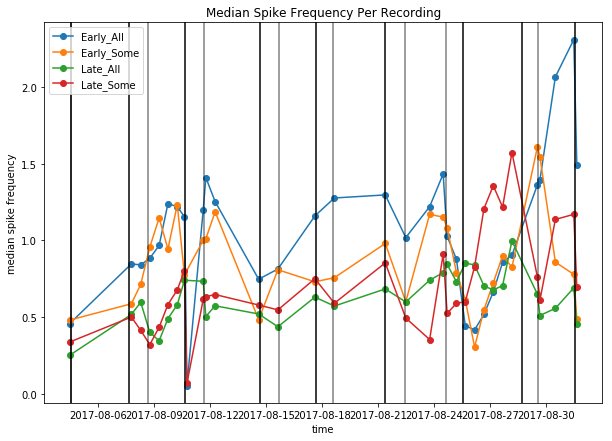

In [45]:
plt.figure(figsize=(10,7))
plotting.plot_medians_per_rec(cat_table, rec_starts, rec_ends, num_rec, yscale = 'linear')
for x in early_media_changes:
    plt.axvline(x, color = 'k')
for x in late_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

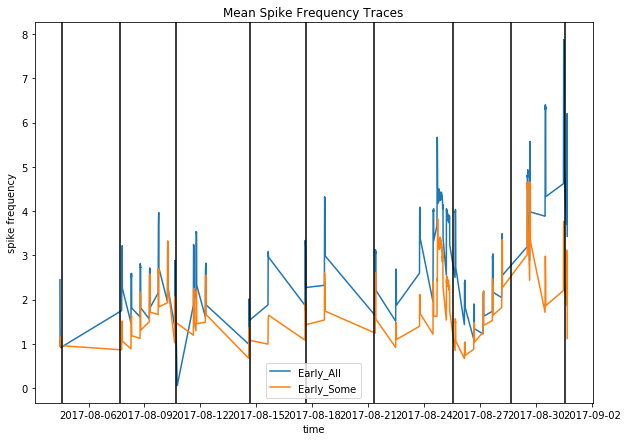

In [46]:
plt.figure(figsize=(10,7))
plotting.plot_mean_frequency_traces(cat_table.query('condition == "Early_All" or condition == "Early_Some"'))
for x in early_media_changes:
    plt.axvline(x, color = 'k')

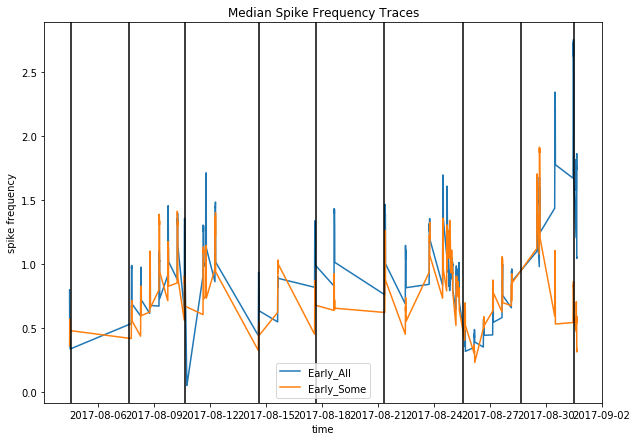

In [47]:
plt.figure(figsize=(10,7))
plotting.plot_median_frequency_traces(cat_table.query('condition == "Early_All" or condition == "Early_Some"'))
for x in early_media_changes:
    plt.axvline(x, color = 'k')

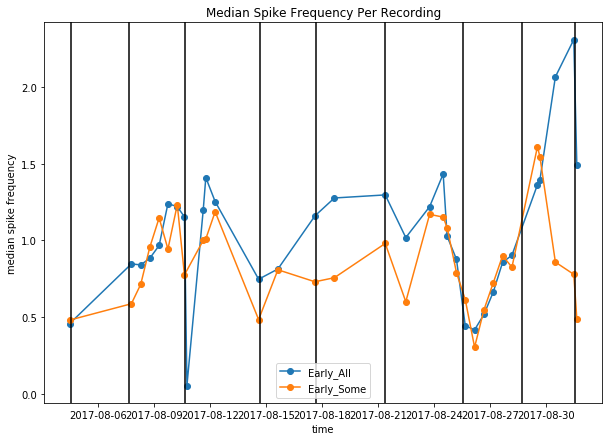

In [56]:
plt.figure(figsize=(10,7))
plotting.plot_medians_per_rec(cat_table.query('condition == "Early_All" or condition == "Early_Some"'), rec_starts, rec_ends, num_rec)
for x in early_media_changes:
    plt.axvline(x, color = 'k')

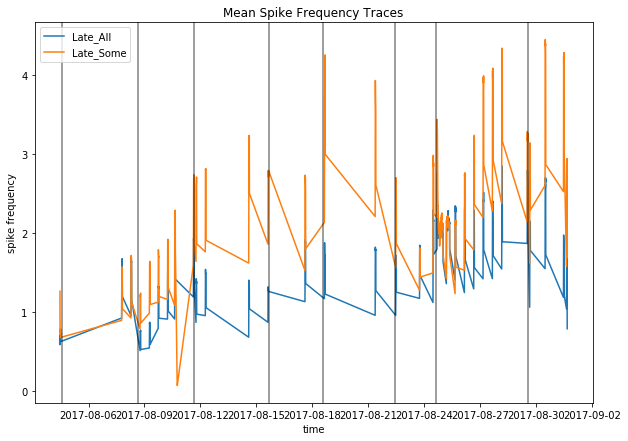

In [50]:
plt.figure(figsize=(10,7))
plotting.plot_mean_frequency_traces(cat_table.query('condition == "Late_All" or condition == "Late_Some"'))
for x in late_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

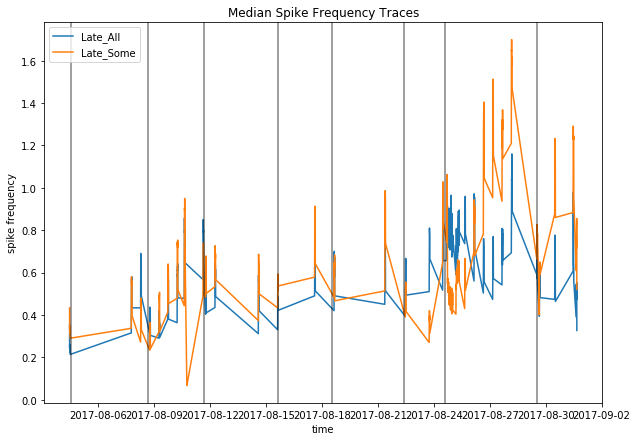

In [51]:
plt.figure(figsize=(10,7))
plotting.plot_median_frequency_traces(cat_table.query('condition == "Late_All" or condition == "Late_Some"'))
for x in late_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

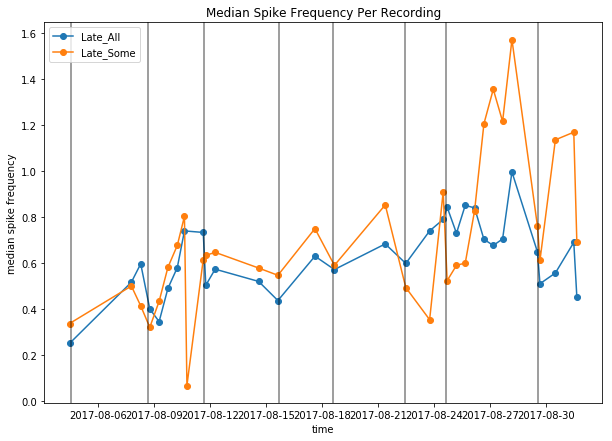

In [57]:
plt.figure(figsize=(10,7))
plotting.plot_medians_per_rec(cat_table.query('condition == "Late_All" or condition == "Late_Some"'), rec_starts, rec_ends, num_rec)
for x in late_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

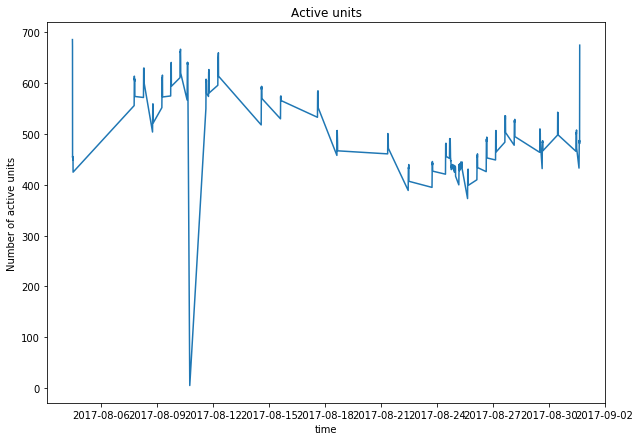

In [53]:
plt.figure(figsize=(10,7))
active_count = plotting.count_active_neurons(cat_table, 0.05, 0)

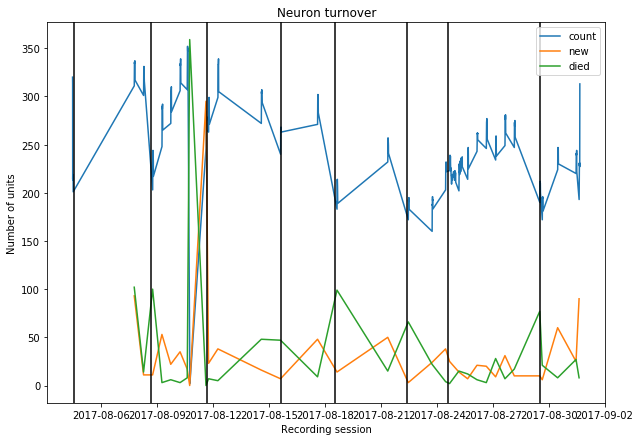

In [19]:
plt.figure(figsize=(10,7))
active_count = plotting.count_active_neurons(cat_table.query('condition == "Late_All" or condition == "Late_Some"'), 0.05, 0)
plotting.compare_active_per_recording(cat_table.query('condition == "Late_All" or condition == "Late_Some"'), 0.05, rec_starts, rec_ends, num_rec)
for x in late_media_changes:
    plt.axvline(x, color = 'k')

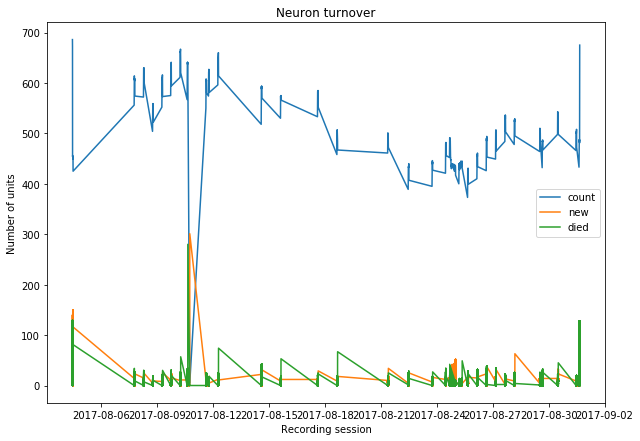

In [60]:
plt.figure(figsize=(10,7))
active_count = plotting.count_active_neurons(cat_table, 0.05, 0)
plotting.compare_active_per_sec(cat_table.query('condition == "Early_All" or condition == "Early_Some"'), 0.05)

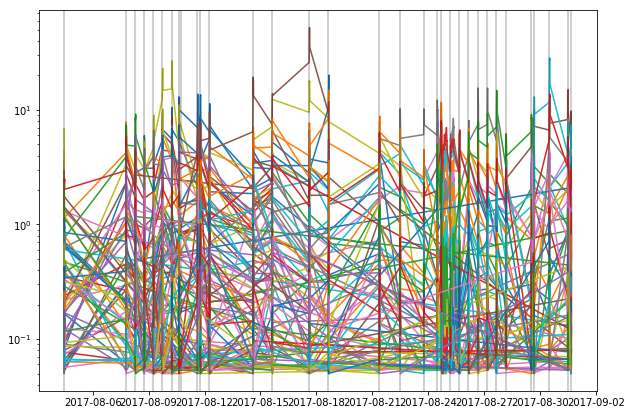

In [61]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces(cat_table.query('unit_name < "B1111" and unit_name > "A3111"'))
plt.yscale('log')
for x in rec_starts:
    plt.axvline(x, color = 'k', alpha = 0.25)

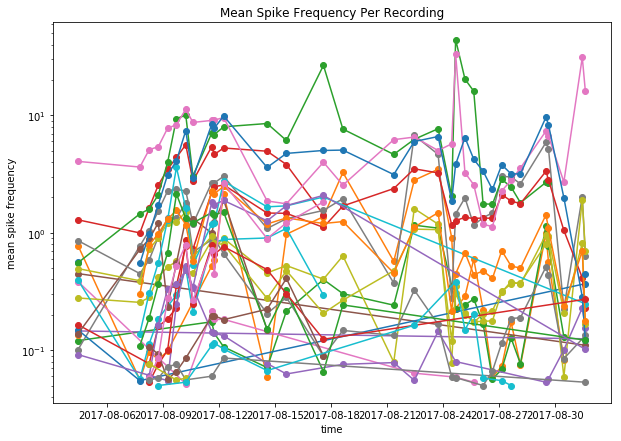

In [84]:
plt.figure(figsize=(10,7))
plotting.plot_unit_means_per_rec(cat_table.query('unit_name >= "E4111" and unit_name < "E5111"'),rec_starts,rec_ends,num_rec)
plt.yscale('log')

Look at effect of media changes:

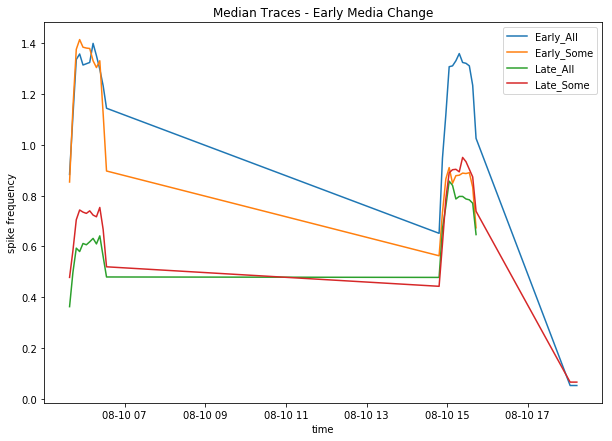

In [70]:
plt.figure(figsize=(10,7))
plotting.plot_median_frequency_traces(cat_table.query('time > "2017-08-10" and time < "2017-08-11"'))
plt.title("Median Traces - Early Media Change")

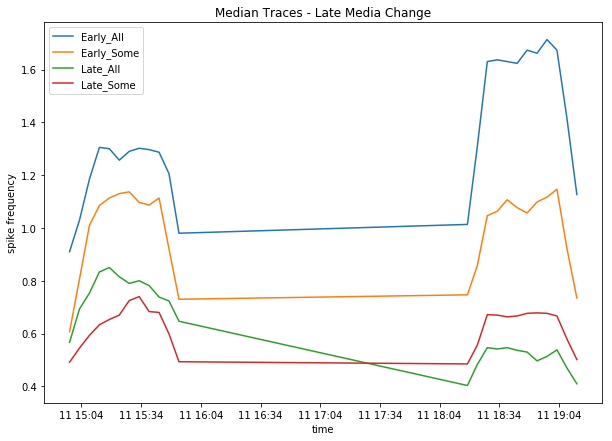

In [71]:
plt.figure(figsize=(10,7))
plotting.plot_median_frequency_traces(cat_table.query('time > "2017-08-11" and time < "2017-08-12"'))
plt.title("Median Traces - Late Media Change")

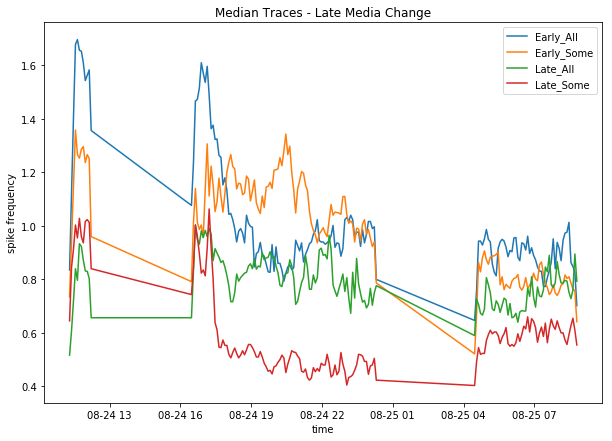

In [77]:
plt.figure(figsize=(10,7))
plotting.plot_median_frequency_traces(cat_table.query('time > "2017-08-24" and time < "2017-08-25 09:00:00"'))
plt.title("Median Traces - Late Media Change")

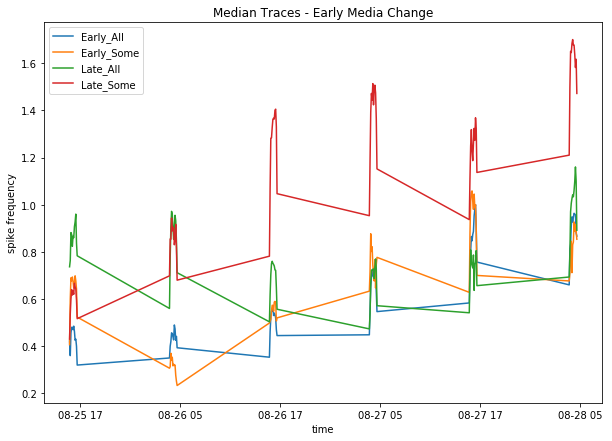

In [76]:
plt.figure(figsize=(10,7))
plotting.plot_median_frequency_traces(cat_table.query('time > "2017-08-25 10:00:00" and time < "2017-08-28 09:00:00"'))
plt.title("Median Traces - Early Media Change")

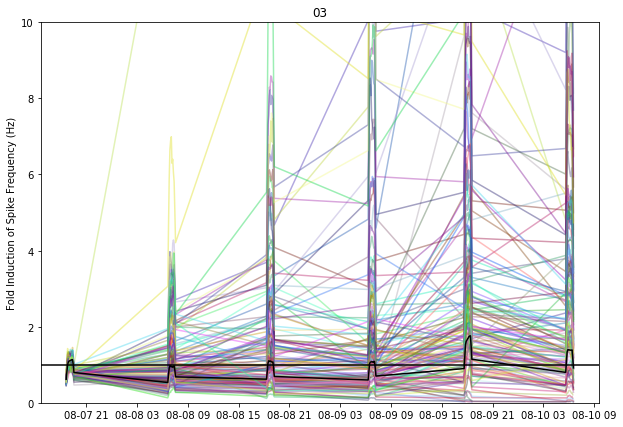

In [25]:
plt.figure(figsize=(10,7))
t1 = rec_starts[1]
t2 = rec_ends[1]
t3 = rec_ends[6]
baseline_table = cat_table.query('time > @t1 and time < @t2')
stim_table = cat_table.query('time > @t2 and time < @t3')
cat_table2 = cat_table.query('time > @t1 and time < @t3')
plotting.foldInductionPlusMean(cat_table2, baseline_table, stim_table, "Early_All", '03', ind_filter = False, var = 2.5, minHz = 0.01, maxHz = 10000, ymax = 10)

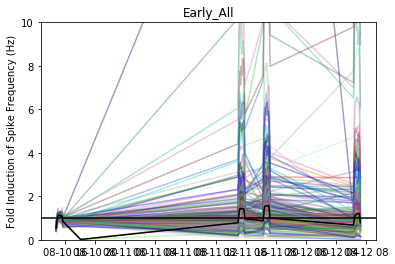

In [21]:
t1 = rec_starts[7]
t2 = rec_ends[7]
t3 = rec_ends[11]
baseline_table = cat_table.query('time > @t1 and time < @t2')
stim_table = cat_table.query('time > @t2 and time < @t3')
cat_table2 = cat_table.query('time > @t1 and time < @t3')
plotting.foldInductionPlusMean(cat_table2, baseline_table, stim_table, "Early_All", 'Early_All', ind_filter = False, var = 2.5, minHz = 0.01, maxHz = 10000, ymax = 10)

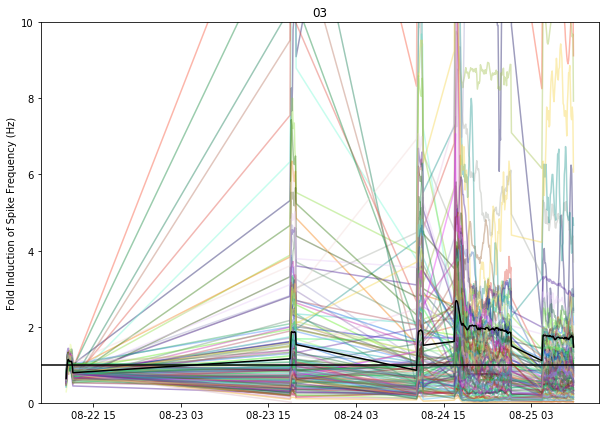

In [26]:
plt.figure(figsize=(10,7))
t1 = rec_starts[17]
t2 = rec_ends[17]
t3 = rec_ends[21]
baseline_table = cat_table.query('time > @t1 and time < @t2')
stim_table = cat_table.query('time > @t2 and time < @t3')
cat_table2 = cat_table.query('time > @t1 and time < @t3')
plotting.foldInductionPlusMean(cat_table2, baseline_table, stim_table, "Early_All", '03', ind_filter = False, var = 2.5, minHz = 0.01, maxHz = 10000, ymax = 10)

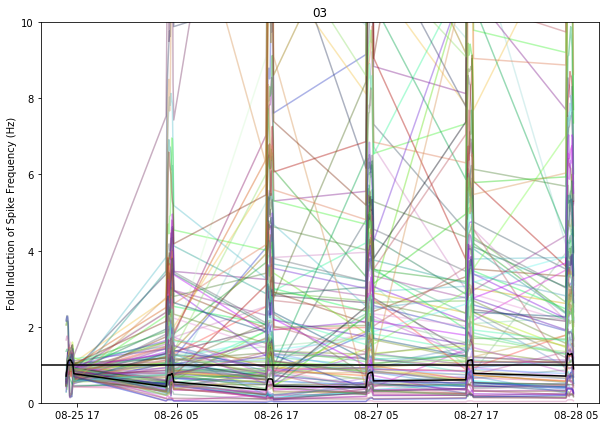

In [27]:
plt.figure(figsize=(10,7))
t1 = rec_starts[22]
t2 = rec_ends[22]
t3 = rec_ends[27]
baseline_table = cat_table.query('time > @t1 and time < @t2')
stim_table = cat_table.query('time > @t2 and time < @t3')
cat_table2 = cat_table.query('time > @t1 and time < @t3')
plotting.foldInductionPlusMean(cat_table2, baseline_table, stim_table, "Early_All", '03', ind_filter = False, var = 2.5, minHz = 0.01, maxHz = 10000, ymax = 10)

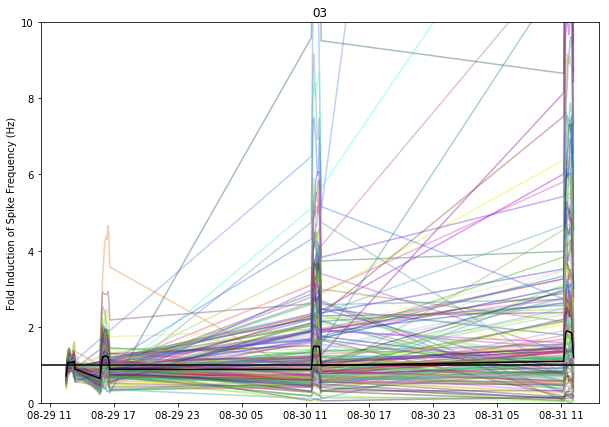

In [28]:
plt.figure(figsize=(10,7))
t1 = rec_starts[28]
t2 = rec_ends[28]
t3 = rec_ends[31]
baseline_table = cat_table.query('time > @t1 and time < @t2')
stim_table = cat_table.query('time > @t2 and time < @t3')
cat_table2 = cat_table.query('time > @t1 and time < @t3')
plotting.foldInductionPlusMean(cat_table2, baseline_table, stim_table, "Early_All", '03', ind_filter = False, var = 2.5, minHz = 0.01, maxHz = 10000, ymax = 10)